## Question ❓

**The circuit diagram below with a driving voltage Vt=5.20V and resistor values in the table below.**

![Imgur](https://i.imgur.com/UPle5bN.png)

**A table of resistance values is below:**

![Imgur](https://i.imgur.com/nxXTUXr.png?1)

**Find Out total of R(resistance) which called Rt.**

# Solution ❗️

**First we'll import the necessary packages. I'm using a jupyter notebook, so the %matplotlib inline command is included. If you want high-resolution circuit diagrams, include the line:**

In [1]:
%config InlineBackend.figure_format = 'svg'

**at the top of the notebook will ensure high-resolution images.**

In [4]:
import matplotlib.pyplot as plt
# if using a jupyter notebook: include %matplotlib inline. If constructing a .py-file: comment out
%matplotlib inline
# if high-resolution images are desired: include %config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e

**Now we'll build the circuit diagram by creating a SchemDraw Drawing object and adding elements to it.**

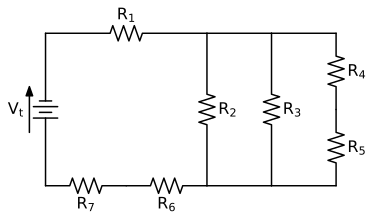

In [5]:
d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('7_resistors_3_loops.png')

**Wow❗️ We draw our first circuit using python.**

## Start Our Calculation 👨🏻‍💻

**Now we'll find the total resistance of the circuit Rt using the individual resistances. First, define the resistances and driving voltage as variables.**

In [6]:
Vt = 5.2
R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

### Find R4,R5 and R6,R7

To simplify the circuit diagram, we'll combine the resistors in series.

For resistors in a simple series circuit:

![Imgur](https://i.imgur.com/8M2ybSS.png)

Since resistors R4 and R5 are in simple series:

![Imgur](https://i.imgur.com/RL0iyOV.png)

Since resistors R6 and R7 are in simple series:

![Imgur](https://i.imgur.com/3XbY03l.png)

We can easily calculate this with Python. After the calculation, we can use an fstring to print the results. Note the round() function is used on the inside of the fstring curly braces { }, in case there are some floating point math errors that lead to the values printing out as long floats.

In [7]:
R45 = R4 + R5
R67 = R6 + R7

print(f'R45 = {round(R45,7)} Ohm, R67 = {round(R67,5)} Ohm')

R45 = 0.0271 Ohm, R67 = 0.0096 Ohm


**Let's redraw our circuit diagram to show the combined resistors.**

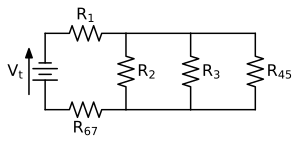

In [8]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R45 = d.add(e.RES, d='up', botlabel='$R_{45}$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('5_resistors_3_loops.png')

### Find R2,R3 & R45

Next we can combine the resistors in parallel. The resistors in parallel are R2, R3 and R45. For a resistors in a simple parallel circuit:

![Imgur](https://i.imgur.com/TppbrEJ.png)

Since R2, R3 and R45 are in parallel:

![Imgur](https://i.imgur.com/RhAHfWD.png)

We can code this calculation in Python. To find the reciprocal, raise the combined sum to the negative one power. Remember, exponentiation is performed with a double asterisk ** in Python.

In [9]:
Vt = 5.2
R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740
R45 = R4 + R5
R67 = R6 + R7
R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
print(f'R2345 = {round(R2345,7)} Ohm')

R2345 = 0.0027602 Ohm


**OK, now let's construct a new SchemDraw diagram of the simplified the circuit. In this diagram, we'll combine R2, R3 and R45 into one big resistor, R2345.**

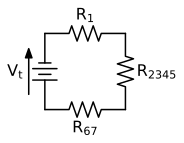

In [10]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
R345 = d.add(e.RES, d='up' , botlabel='$R_{2345}$')
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('3_resistors_1_loop.png')

## Finally Find Rt 

To find Rt, we again combine the resistors in series. The remaining resistors R1, R2345 and R67 are in series:

![Imgur](https://i.imgur.com/pglSk9x.png)

We'll call the total resistance of the circuit Rt which is equal to R1234567

![Imgur](https://i.imgur.com/W4QUulb.png)

Final calculation in Python.

In [11]:
Vt = 5.2
R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740
R45 = R4 + R5
R67 = R6 + R7
R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
Rt = R1 + R2345 + R67
print(f'Rt = {round(Rt,7)} Ohm')

Rt = 0.0255602 Ohm


Final circuit diagram. The simplest one. This SchemDraw diagram just includes Vt and Rt.

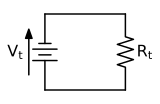

In [13]:
d = schem.Drawing(unit=2.5)
L2 = d.add(e.LINE, d='right')
Rt = d.add(e.RES, d='up' , botlabel='$R_{t}$')
L1 = d.add(e.LINE, d='left', tox=L2.start)
Vt = d.add(e.BATTERY, d='up', xy=L2.start, toy=L1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('1_resistor_no_loops.png')

# So, Finally Done Our Circuit Calculation. Now go to home❗️❗️

![Imgur](https://i.imgur.com/IaIUWhI.jpg)